In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [7]:
#import modules
import pandas as pd #olah dan analisis data #olah dan analisis data

In [8]:
diabetes_df = pd.read_csv ('/kaggle/input/diabetes-dataset/diabetes.csv') # memuat file csv sebagai data frame
diabetes_df.head () # tampilkan 5 baris pertama

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#drop column id
#iris_df = iris_df.drop(columns='id')
diabetes_df.drop(columns='Glucose', inplace=True) # menghapus kolom 'Glocuse'
diabetes_df.head() # tampilkan 45 baris pertama

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1


In [10]:
#identify the shape of the dataset
diabetes_df.shape #bentuk/dimensi dataset (baris, kolom)

(768, 8)

In [11]:
#get the list of columss
diabetes_df.columns #daftar data untuk setiap kolom

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
#get bassic dataset information
diabetes_df.dtypes # tipedata untuk tiap kolom

Pregnancies                   int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
#get bassic dataset information
diabetes_df.info #informasi dataset 

<bound method DataFrame.info of      Pregnancies  BloodPressure  SkinThickness  Insulin   BMI  \
0              6             72             35        0  33.6   
1              1             66             29        0  26.6   
2              8             64              0        0  23.3   
3              1             66             23       94  28.1   
4              0             40             35      168  43.1   
..           ...            ...            ...      ...   ...   
763           10             76             48      180  32.9   
764            2             70             27        0  36.8   
765            5             72             23      112  26.2   
766            1             60              0        0  30.1   
767            1             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3  

In [14]:
#identify missing values
#iris_df.insull()values.any()
diabetes_df.isna().values.any() #mendeteksi keberadaan nilai kosong

False

In [15]:
#identify duplicate entries / rows
#iris_df[iris_df.duplicated(keep=false)] #tampilkan seluruh baris dengan duplikasi
diabetes_df[diabetes_df.duplicated()] #tampilkan hanya baris duplikasi sekunder

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [16]:
diabetes_df.duplicated().value_counts() # hitung jumlah duplikasi data

False    768
dtype: int64

In [17]:
#drop duplicate entries/rows
diabetes_df.drop_duplicates(inplace=True) #menghapus duplikasi data
diabetes_df.shape # melihat dimensi data

(768, 8)

# **Describe the dataset**

In [18]:
diabetes_df.describe() #deskripsi data

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
#correlation matrix
diabetes_df.corr() #kolerasi antar kolom

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
BloodPressure,0.141282,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
#iris dataset: data visualisation
import matplotlib.pyplot as plt #visualsisai data
import seaborn as sns #visualisasi data

#output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline

In [21]:
#iris dataset = classification models
#import modules
from sklearn.model_selection import train_test_split# pembagi dataset menjadi training
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model
        

In [22]:
#dataset:features & class label
X = diabetes_df.drop(columns='Outcome') # menempatkan featrues ke dalam variable x
X.head() #tampilkan 5 baris pertama

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,72,35,0,33.6,0.627,50
1,1,66,29,0,26.6,0.351,31
2,8,64,0,0,23.3,0.672,32
3,1,66,23,94,28.1,0.167,21
4,0,40,35,168,43.1,2.288,33


In [23]:
y = diabetes_df ['BMI']
y.head() # tampilkan 5 baris pertama

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset')
print(X_test.shape)
print(y_test.shape)

training dataset
(614, 7)
(614,)

testing dataset
(154, 7)
(154,)


# k-nearest neighbors algorithm

In [64]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Memuat data diabetes
data = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

# Menentukan variabel target dan fitur
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menentukan jangkauan nilai k yang akan diuji
k_range = list(range(1, 26))

# Melakukan klasifikasi untuk setiap nilai k dan menyimpan hasilnya
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Mencari nilai k yang memberikan akurasi tertinggi
best_k = k_range[scores.index(max(scores))]
print("Nilai k terbaik:", best_k)

# Membuat model k-nearest neighbors dengan k terbaik dan melatihnya pada data latih
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji dan menampilkan akurasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)


Nilai k terbaik: 12
Akurasi model: 0.7792207792207793


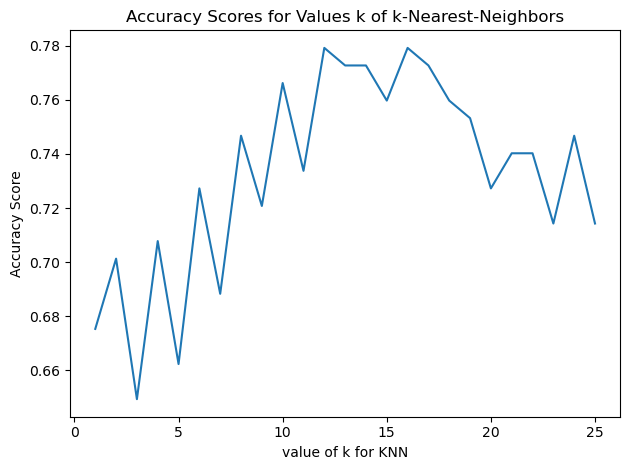

In [26]:
import matplotlib.pyplot as plt

# definisikan k_range dan scores terlebih dahulu

plt.plot(k_range, scores)
plt.xlabel('value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [31]:
model_knn = KNeighborsClassifier(n_neighbors=3) #konfigurasi algoritma
model_knn.fit(X_train,y_train) #traning model/classifier
y_pred = model_knn.predict(X_test) #melakukan prediksi



In [28]:
#confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[65 34]
 [20 35]]


In [32]:
#classification report
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154



# Logistic regression algorithm


In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# load dataset
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

# split the dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model and fit it to the training data
model_logreg = LogisticRegression(max_iter=10000, solver='lbfgs')
model_logreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_logreg.predict(X_test)

In [22]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


In [20]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[78 21]
 [18 37]]


In [21]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# support vector machine classifier algorithm (SVM)

In [24]:
#support vector classifier (model SVM)
from sklearn.svm import SVC

In [25]:
#model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
model_svc = model_svc.predict(X_test)

# Decision tree classifier algorithm

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# load dataset
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

# split the dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# make predictions on the testing set
y_pred = model_dt.predict(X_test)

# generate classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [35]:
# create a Decision Tree classifier model and fit it to the training data
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# random forest classifier algortihm

# **Random Forest Classifier Algorithm**

In [40]:
#decision tree classifier (DT)
from sklearn.ensemble import RandomForestClassifier

In [44]:
#model_rf = randomforestclassifier
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

# Accuracy comprasion for various models

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

# Split the dataset into features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Train the support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

In [59]:
# initialize models
model_knn = KNeighborsClassifier()
model_logreg = LogisticRegression()
model_svc = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

# fit each model to the training data
model_knn.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)
model_svc.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
#accuracy comparision for various models.
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.6948051948051948, 0.7532467532467533, 0.7337662337662337, 0.7402597402597403, 0.7402597402597403]


# accuracy comprasion for various models with matplotlib

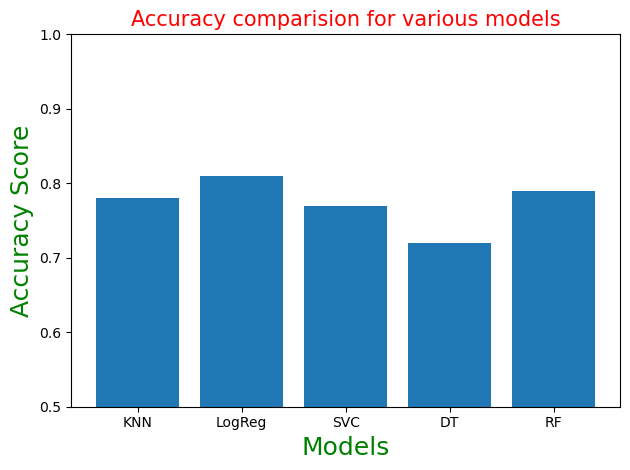

In [90]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.5,1)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()